# Quantum circuits and customized gates

So, let us play with some circuits and gates features provided by Qiskit!

In [1]:
import numpy as np

from qiskit import QuantumCircuit, BasicAer, execute, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit.circuit.library import SGate, XGate

## Visualizing Circuits

<b> 1.`qc.draw()` <b>

* Possible options:
    * 'mpl'
    * 'latex'
    * 'text' (default)
    * 'latex_source'
    
    
<b> 2.`filename='file.png'` <b>  - to save a draw as file.png


As an example, we compute GHZ state:

\begin{aligned}
    \frac{1}{\sqrt{2}}\left[| 000 \rangle +  | 111 \rangle\right]
\end{aligned}

For this purpose, let's define manually the number of qubtis and bits with: `QuantumRegister`,`ClassicalRegister`

In [2]:
q = QuantumRegister(3, 'qubit')
c = ClassicalRegister(3, 'cbit')

ghz = QuantumCircuit(q,c)
ghz.h(q[0]) # or just 0
ghz.cx(q[0],q[1]) #por just 0,1
ghz.cx(1,2)

#Let us implement some barriers
ghz.barrier(0,2) 
ghz.barrier(1)
ghz.barrier()

ghz.measure([0,1,2],[0,1,2])

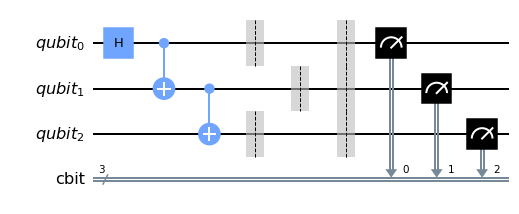

In [3]:
ghz.draw('mpl',filename='fig.png')

Notice it saved the figure as fig.png in the save folder where this notebook is

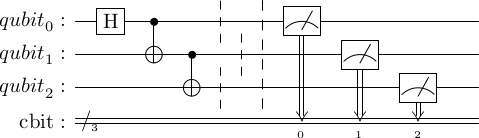

In [4]:
ghz.draw('latex')

In [5]:
#'text' by default
ghz.draw()

┌───┐           ░     ░ ┌─┐      
qubit_0: ┤ H ├──■────────░─────░─┤M├──────
         └───┘┌─┴─┐      ░  ░  ░ └╥┘┌─┐   
qubit_1: ─────┤ X ├──■──────░──░──╫─┤M├───
              └───┘┌─┴─┐ ░  ░  ░  ║ └╥┘┌─┐
qubit_2: ──────────┤ X ├─░─────░──╫──╫─┤M├
                   └───┘ ░     ░  ║  ║ └╥┘
 cbit: 3/═════════════════════════╩══╩══╩═
                                  0  1  2

In [6]:
ghz.draw('latex_source')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{qubit}_{0} :  } & \\lstick{{qubit}_{0} :  } & \\gate{\\mathrm{H}} & \\ctrl{1} & \\qw \\barrier[0em]{0} & \\qw & \\qw \\barrier[0em]{2} & \\qw & \\meter & \\qw & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{qubit}_{1} :  } & \\lstick{{qubit}_{1} :  } & \\qw & \\targ & \\ctrl{1} & \\qw \\barrier[0em]{0} & \\qw & \\qw & \\qw & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\nghost{{qubit}_{2} :  } & \\lstick{{qubit}_{2} :  } & \\qw & \\qw & \\targ \\barrier[0em]{0} & \\qw & \\qw & \\qw & \\qw & \\qw & \\meter & \\qw & \\qw\\\\\n\t \t\\nghost{\\mathrm{{cbit} :  }} & \\lstick{\\mathrm{{cbit} :  }} & \\lstick{/_{_{3}}} \\cw & \\cw & \\cw & \\cw & \\cw & \\cw & \\dstick{_{_{\\hspace{0.0em}0}}} \\cw \\ar @{<=} [-3,0] & \\dstick{_{_{\\hspace{0.0em}1}}} \\cw \\ar @{<=} [-2,0] & \\dstick{_{_{\\hspace{0.0em}2}}} \\

we can also print a circuit

In [7]:
#'text' by default also
print(ghz)

         ┌───┐           ░     ░ ┌─┐      
qubit_0: ┤ H ├──■────────░─────░─┤M├──────
         └───┘┌─┴─┐      ░  ░  ░ └╥┘┌─┐   
qubit_1: ─────┤ X ├──■──────░──░──╫─┤M├───
              └───┘┌─┴─┐ ░  ░  ░  ║ └╥┘┌─┐
qubit_2: ──────────┤ X ├─░─────░──╫──╫─┤M├
                   └───┘ ░     ░  ║  ║ └╥┘
 cbit: 3/═════════════════════════╩══╩══╩═
                                  0  1  2 


<b> 3. Storing a qubit in a specific cbit <b>

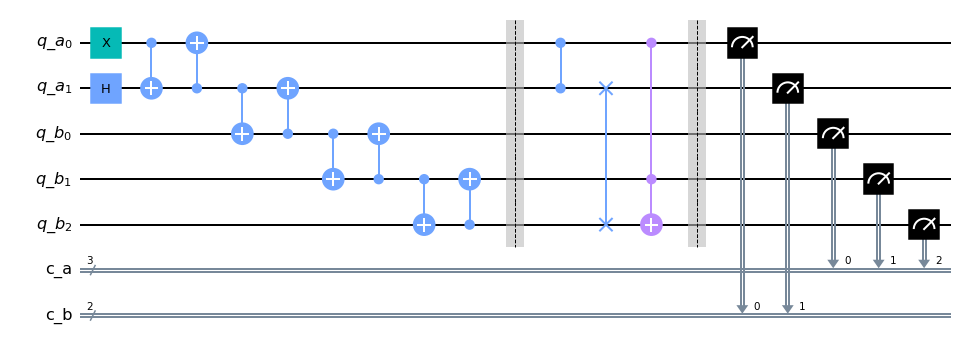

In [8]:
q_a = QuantumRegister(2, 'q_a')
q_b = QuantumRegister(3, 'q_b')
c_a = ClassicalRegister(3,'c_a')
c_b = ClassicalRegister(2,'c_b')

qc_man = QuantumCircuit(q_a, q_b,c_a, c_b)

qc_man.x(0)
qc_man.h(1)
for i in range(4):
    qc_man.cx(i,i+1)
    qc_man.cx(i+1,i)

qc_man.barrier()

qc_man.cz(0,1)
qc_man.swap(1,4)
qc_man.ccx(0,3,4)
qc_man.barrier()

#q_a qubtis will be stored at c_b bits
qc_man.measure(q_a, c_b)

#q_b qubtis will be stored at c_a bits
qc_man.measure(q_b, c_a)

qc_man.draw('mpl')

## Composing Circuits

* `qc.compose(circ)`

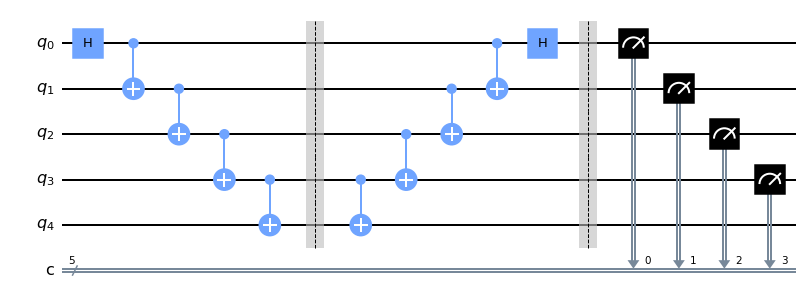

In [9]:
#number of qubtis and classical registers

num_qubits = 5
num_bits = 5

#Tirst circuit
qc_comp1 = QuantumCircuit(num_qubits,num_bits)

qc_comp1.h(0)
for i in range(num_qubits-1):
    qc_comp1.cx(i,i+1)

qc_comp1.barrier()

#Second circuit
qc_comp2 = QuantumCircuit(num_qubits,num_bits)
for i in reversed(range(num_qubits-1)):
    qc_comp2.cx(i,i+1)

qc_comp2.h(0)

qc_comp2.barrier()


#Thid circuit
qc_comp3 = QuantumCircuit(num_qubits, num_bits)
for i in range(num_qubits-1):
    qc_comp3.measure([i],[i])


new_circ = qc_comp1.compose(qc_comp2).compose(qc_comp3)
new_circ.draw('mpl')

## Parametrized Circuits

* `qiskit.circuit.Parameter()`

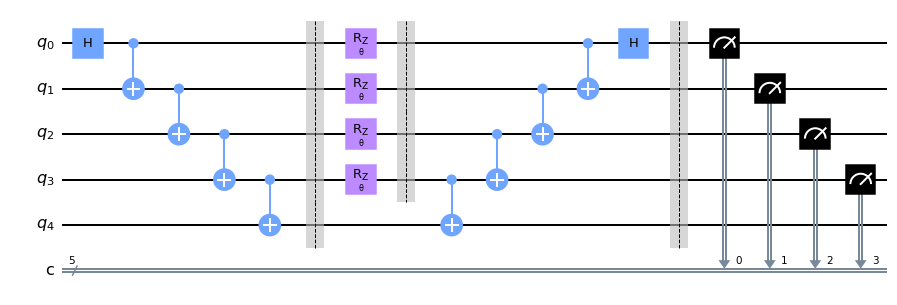

In [10]:
from qiskit.circuit import Parameter
    
#theta = 2*np.pi
theta = Parameter('θ')

qc_param = QuantumCircuit(num_qubits-1) 

qc_param.rz(theta, range(5-1))
qc_param.barrier()

param_circ = qc_comp1.compose(qc_param).compose(qc_comp2).compose(qc_comp3)
param_circ.draw('mpl')

<b> Note, with the function `QuantumCircuit.compose()`, we can compose circuits with different number of qubits <b>

* we can also compose circuits as a sum. However, all circuits must possess the same number of qubtis.
* `QuantumCircuit.__add__()` method is being deprecated as you will see in the warning mensage.  

/tmp/ipykernel_10085/3879603678.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  new_circ2 = qc_comp1 + qc_comp2 + qc_comp3


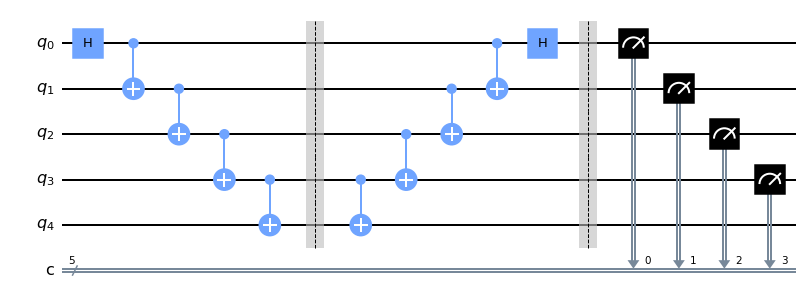

In [11]:
new_circ2 = qc_comp1 + qc_comp2 + qc_comp3
new_circ2.draw('mpl')

In addition, one can 

* draw a circuit in reversed way: `reverse_bits = True`
* change plots size and style: `scale = 0.8` and `style={'backgroundcolor': 'lightblue'}`
* also remove all barriers : `plot_barriers=False`

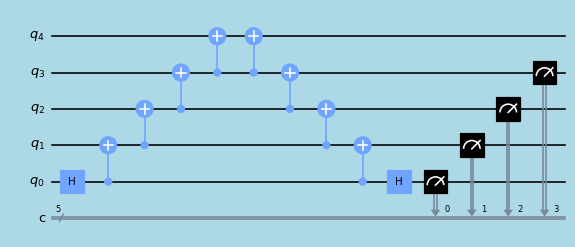

In [12]:
new_circ2.draw(output ='mpl',  plot_barriers=False, reverse_bits = True, 
               style={'backgroundcolor': 'lightblue'}, scale = 0.8)

## Depth of a circuit

* `qc.depth()`

In [13]:
param_circ.depth()

12

A circuit may have diferente dephts depending on the number of barriers applied. Comment param_circ.barrier() to see the difference.

In [14]:
param_circ.barrier()
param_circ.h(0)

param_circ.depth()

13

## Transpile  

Transpiling a circuit it a specific set of basis gates: `transpile(QuantumCircuit, basis_gates = ['Gate1','Gate2','Gate3'])`.

There are other options as well. For more infos, take a look in: https://qiskit.org/documentation/apidoc/transpiler.html

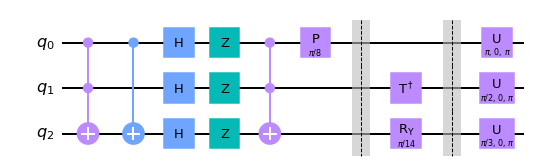

In [15]:
qc_tr = QuantumCircuit(3)
qc_tr.mct([0,1],2)
qc_tr.cx(0,2)

for ii in range(3):
    qc_tr.h(ii)
    qc_tr.z(ii)

qc_tr.ccx(0,1,2)
qc_tr.p(np.pi/8, 0)

qc_tr.barrier()
qc_tr.tdg(1)
qc_tr.ry(np.pi/14,2)
qc_tr.barrier()

for ii in range(3):
    qc_tr.u(np.pi/(ii+1), 0, np.pi, ii)

qc_tr.draw('mpl')

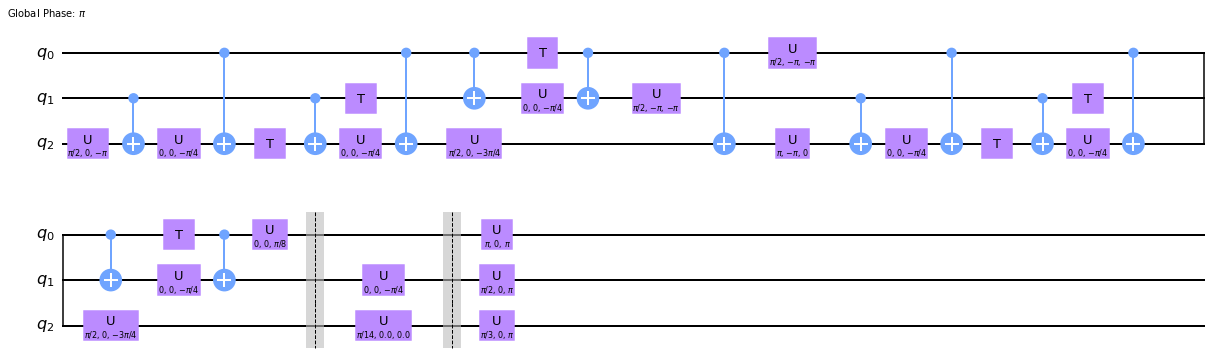

In [16]:
trans = transpile(qc_tr, basis_gates = ['u','cx','t','z'])
trans.draw('mpl')

## Playing with customized Gates

### Creating Gates manually

* `Gate`

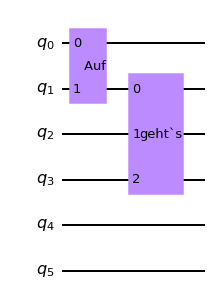

In [17]:
from qiskit.circuit import Gate
from qiskit.circuit.library import HGate

cust_gate = Gate(name = ' Auf', num_qubits = 2, params =[])
cust_gate1 = Gate(name = 'geht`s', num_qubits = 3, params =[])

#Applying the gate
#lets rename the circuit
qc_gate = QuantumCircuit(6, name ='KoeMenor')
qc_gate.append(cust_gate, [0,1])
qc_gate.append(cust_gate1, [1,2,3])

qc_gate.draw('mpl')

### Circuit to gates 

* `qc.to_gate()`

And it is also possible to rename it as desired `QuantumCircuit.name` or also `QuantumCircuit(num_qubits, name = '')`

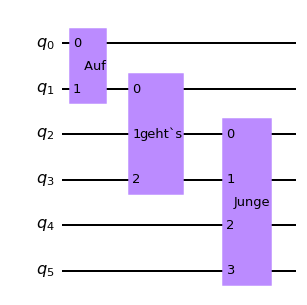

In [18]:
#circuit
qc_aux = QuantumCircuit(4)

#It is possible to name a circuit!
qc_aux.name =  "Junge"

lets_go_gate = qc_aux.to_gate()

#circuit to gate
qc_gate.append(lets_go_gate, [2,3,4,5]) #the first two are control

qc_gate.draw('mpl')

### Wrapping up gates

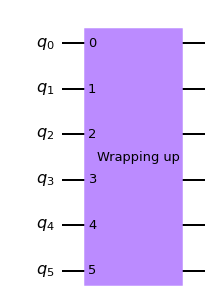

In [19]:
qc_to_gate = qc_gate.to_gate()
qc_to_gate.name = 'Wrapping up'

qc_comp = QuantumCircuit(6)
qc_comp.append(qc_to_gate, [0,1,2,3,4,5])

qc_comp.draw('mpl')

### Decomposing it again

* `qc.decompose()`


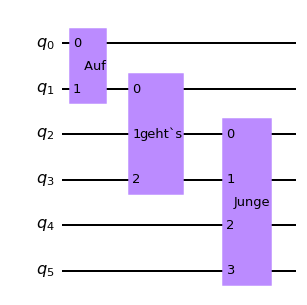

In [20]:
qc_decomp0 = qc_comp.decompose()
qc_decomp0.draw('mpl')

<b> 1. Second example <b>

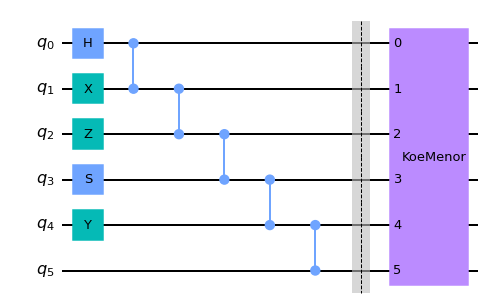

In [21]:
# converting to a gate and put it in arbitrary place in the other circuit
sub_inst = qc_gate.to_instruction()


# first circuit

qc_f = QuantumCircuit(num_qubits+1)
qc_f.h(0)
qc_f.x(1)
qc_f.z(2)
qc_f.s(3)
qc_f.y(4)

for i in range(num_qubits+1-1):
    qc_f.cz(i,i+1)

qc_f.barrier()

# adding the other

qc_f.append(sub_inst, [0,1,2,3,4,5])


qc_f.draw('mpl')

Notice, it decomposes all the gates

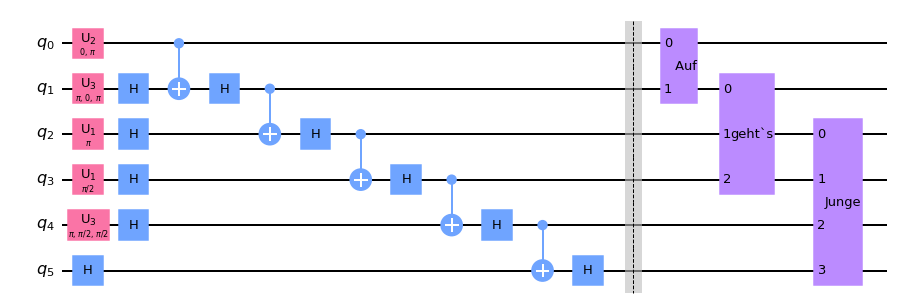

In [22]:
# decomposing gates

qc_decomp = qc_f.decompose()
qc_decomp.draw('mpl')

## Custom controlled-Gates

we can build controlled-Gates with `Gate.control(c_qubtis)` where c_qubtis is the number of control qubits
* `SGates`

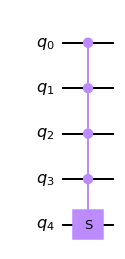

In [23]:
#we can specify how many controls we want
gener_cnot = SGate().control(4) 

qc_cnot = QuantumCircuit(5)

qc_cnot.append(gener_cnot, [0,1,2,3,4]) 
qc_cnot.draw('mpl')

* In this case, [c,c,c,c,t], where 'c' correspond to the controll and 't' to the target qubits respectively
* it counts the controlled qubits from left to the right until c_qubtis in Gate.control (c_qubtis) - (in this case is 4)

More generally

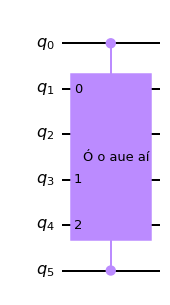

In [24]:
#circuit
qc_aux = QuantumCircuit(3)

#of course you can wrap some gates into this genreal one
qc_aux.cx(0,1)
qc_aux.rz(np.pi/2,2)
# or also do not operate with any gate at all

qc_aux.name =  "Ó o aue aí"
lets_go_gate = qc_aux.to_gate().control(2)

#circuit to gate
qc_contr = QuantumCircuit(6)
qc_contr.append(lets_go_gate, [0,5,1,3,4])

qc_contr.draw('mpl')